## Informasi Mahasiswa

Nama: Muhammad Farhan

NPM: 2108107010050



# Dataset

Source dataset: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

Dataset ini berisi 9568 titik data yang dikumpulkan dari Pembangkit Listrik Siklus Gabungan selama 6 tahun (2006-2011), ketika pembangkit listrik diatur untuk bekerja dengan beban penuh.  Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

## Studi Kasus

Membangun model untuk melakukan prediksi net hourly electrical energy output berdasarkan Rata-rata suhu lingkungan. 

# Library Yang Digunakan

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset

In [2]:
# Baca dataset
df = pd.read_excel("data/power.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Preprocessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
#drop duplicate data
df.drop_duplicates(inplace=True)

#check duplicate data
df.duplicated().sum()

0

# Exploratory Data Analysis

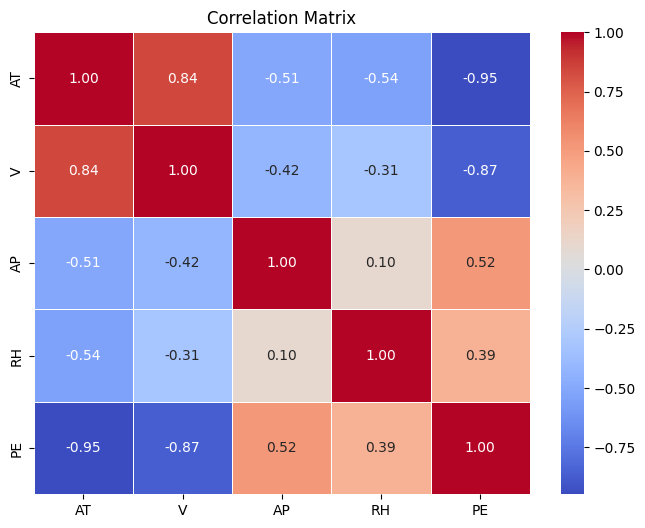

In [6]:
#check korelasi

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Split dataset dan Normalisasi Data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = df[['AT']]  # Notice the double brackets to keep it as a DataFrame
y = df['PE']

# Scaling the data independent variable
X_scaled = scaler.fit_transform(X)  # Ensure X remains a 2D array after scaling
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).flatten()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


## Membangun Model


In [8]:
from sklearn import metrics

# Fungsi untuk menampilkan hasil evaluasi model
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [9]:
from sklearn.svm import SVR

# Instantiate SVR with polynomial kernel
svr_poly = SVR(kernel='poly', C=10, gamma=0.1,coef0=1,epsilon=0.2, degree=3)
svr_poly_trial = SVR(kernel='poly', C=10, degree=3)

# Train SVR model
svr_poly.fit(X_train, y_train)
svr_poly_trial.fit(X_train, y_train)

# Predict using the trained model
y_pred = svr_poly.predict(X_test)
y_pred_trial = svr_poly_trial.predict(X_test)

# Evaluate the model
print_evaluate(y_test, y_pred) 

print('Trial Model tanpa paramater apa pun :')
print_evaluate(y_test, y_pred_trial)

MAE: 0.23161677226954502
MSE: 0.08993732389348678
RMSE: 0.2998955216295948
R2 Square 0.911162552593954
__________________________________
Trial Model tanpa paramater apa pun :
MAE: 0.491544790759159
MSE: 0.3515640434027055
RMSE: 0.5929283627915817
R2 Square 0.6527353620991325
__________________________________


# Visualisasi Data


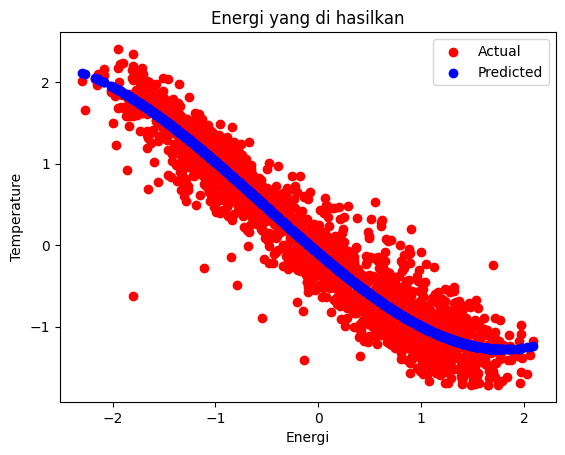

In [10]:
# Scatter plot of test data dan predicted data
plt.scatter(X_test[:,0], y_test, color='red', label='Actual')
plt.scatter(X_test[:,0], y_pred, color='blue', label='Predicted')
plt.title('Energi yang di hasilkan')
plt.xlabel('Energi')
plt.ylabel('Temperature')
plt.legend()
plt.show()